# Spam Detection using Machine Learning

1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

2. Load Dataset


In [2]:
df = pd.read_csv('spam.csv', encoding_errors='replace')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

3. Data Cleaning


In [5]:
# Check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Remove unnecessary columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Rename columns for better clarity
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)

In [9]:
df.sample(5)

,Target,Text
2754,ham,Ok Chinese food on its way. When I get fat you...
3193,ham,And you! Will expect you whenever you text! Ho...
256,ham,Mmm so yummy babe ... Nice jolt to the suzy
3207,ham,Oops my phone died and I didn't even know. Yea...
1700,ham,Please ask mummy to call father


In [10]:
# Convert target labels to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df.Target = le.fit_transform(df.Target)

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Check for missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:

# Check for duplicates
df.duplicated().sum()


403

In [15]:
# Remove duplicate entries
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

4. Exploratory Data Analysis


In [ ]:
# Check class distribution
df.Target.value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

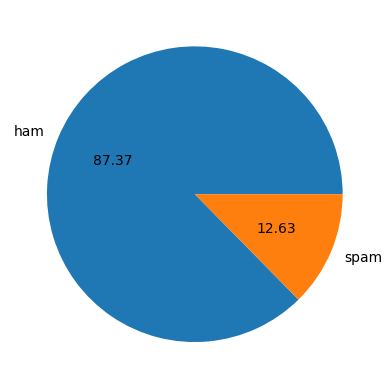

In [18]:

# Visualize class distribution
plt.pie(df.Target.value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

# There seems to be imbalance in the data. There are a large number of ham messages and much fewer spam messages.


In [19]:
import nltk

In [20]:
# Add text length feature
df['Num_Characters'] = df.Text.apply(len)

In [21]:
df.head()

,Target,Text,Num_Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# Add word count feature
df['Num_Words'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,Target,Text,Num_Characters,Num_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# Add sentence count feature
df['Num_Sentences'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
# Statistical summary of text features
df[['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456761,1.966531
std,58.174846,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# Statistics for ham messages
df[df.Target == 0][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123782,1.820195
std,56.356802,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Statistics for spam messages
df[df.Target == 1][['Num_Characters', 'Num_Words', 'Num_Sentences']].describe()

,Num_Characters,Num_Words,Num_Sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='Num_Characters', ylabel='Count'>

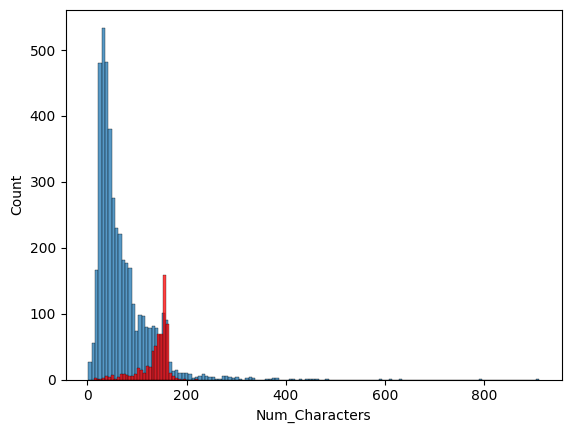

In [30]:
# Character distribution by message type
sns.histplot(df[df.Target == 0]['Num_Characters'])
sns.histplot(df[df.Target == 1]['Num_Characters'], color='red')

<Axes: xlabel='Num_Words', ylabel='Count'>

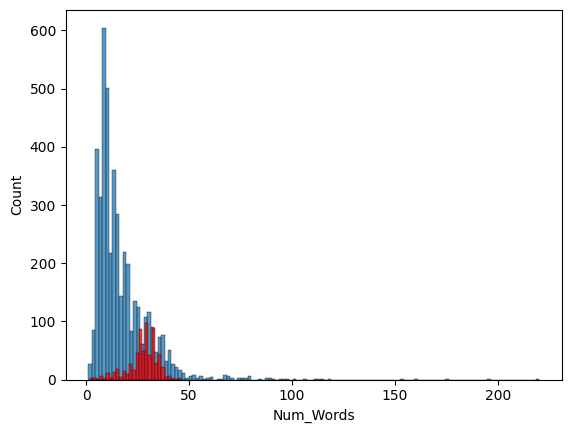

In [31]:
# Word distribution by message type
sns.histplot(df[df.Target == 0]['Num_Words'])
sns.histplot(df[df.Target == 1]['Num_Words'], color='red')

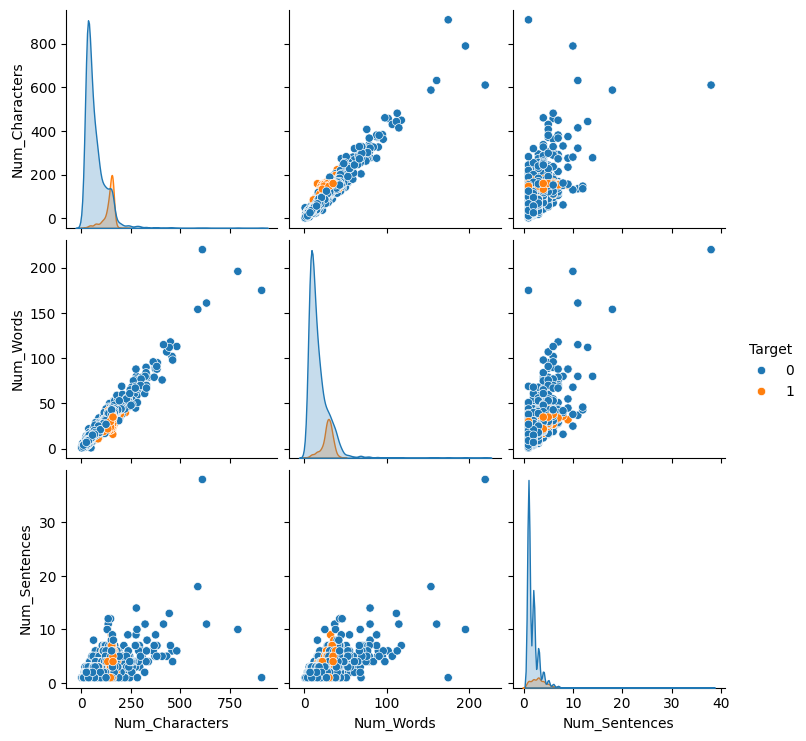

In [32]:
# Relationships between features
sns.pairplot(df, hue='Target')
plt.show()

<Axes: >

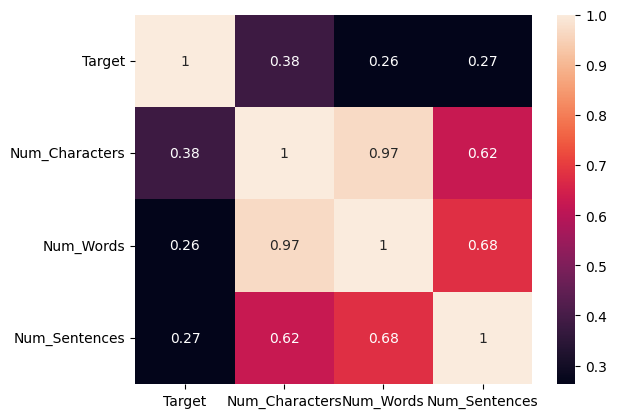

In [33]:
# Correlation analysis
sns.heatmap(df[['Target', 'Num_Characters', 'Num_Words', 'Num_Sentences']].corr(), annot=True)

5. Text Preprocessing


In [34]:
from nltk.corpus import stopwords # Import stopwords from nltk corpus for removing common words
from nltk.stem.porter import PorterStemmer # Import PorterStemmer for word stemming
import string
ps = PorterStemmer()

In [35]:
def transform_text(text):
    """
    Preprocess text data by:
    1. Converting to lowercase
    2. Tokenizing
    3. Removing non-alphanumeric tokens
    4. Removing stopwords and punctuation
    5. Applying stemming
    """
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [ps.stem(word) for word in text]
    return " ".join(text)

In [36]:
# Apply text transformation
df['Transformed_Text'] = df['Text'].apply(transform_text)

In [37]:
df.head()

,Target,Text,Num_Characters,Num_Words,Num_Sentences,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


6. Text Visualization

In [38]:
from wordcloud import WordCloud

In [39]:
wc = WordCloud(width=1000, height=1000, min_font_size=10, background_color='white')

In [40]:
# Generate word cloud for spam messages
spam_wc = wc.generate(df[df.Target == 1]["Transformed_Text"].str.cat(sep=" "))

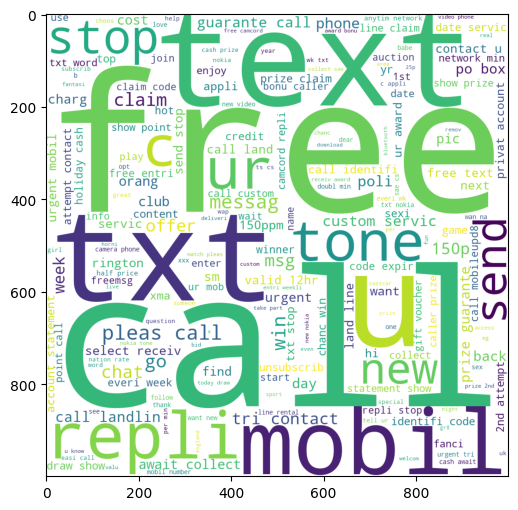

In [41]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.show()

In [42]:
# Generate word cloud for ham messages
ham_wc = wc.generate(df[df.Target == 0]["Transformed_Text"].str.cat(sep=" "))

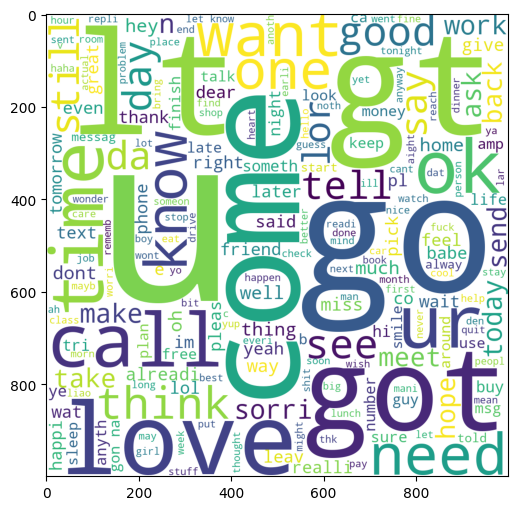

In [43]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.show()

In [44]:
df[df.Target == 1].Transformed_Text.to_list()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [45]:
# Create corpus of spam words
spam_corpus = [word for msg in df[df.Target == 1]['Transformed_Text'] for word in msg.split()]

In [46]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [47]:
len(spam_corpus)

9941

In [48]:
# Import Counter class from collections module to count occurrences of elements in iterables
from collections import Counter

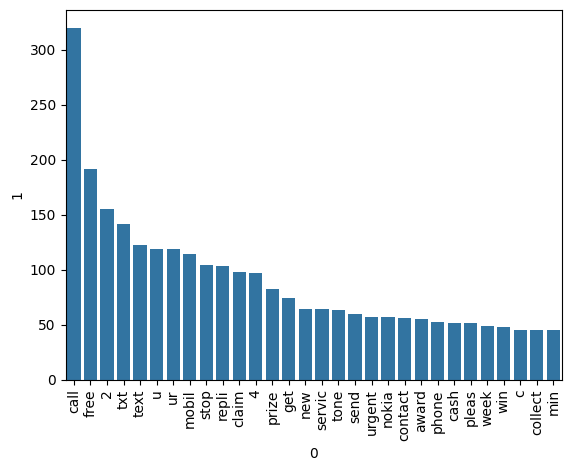

In [49]:
# Visualize most common spam words
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
# Create corpus of ham words
ham_corpus = [word for msg in df[df.Target == 0]['Transformed_Text'] for word in msg.split()]

In [51]:
len(ham_corpus)

35305

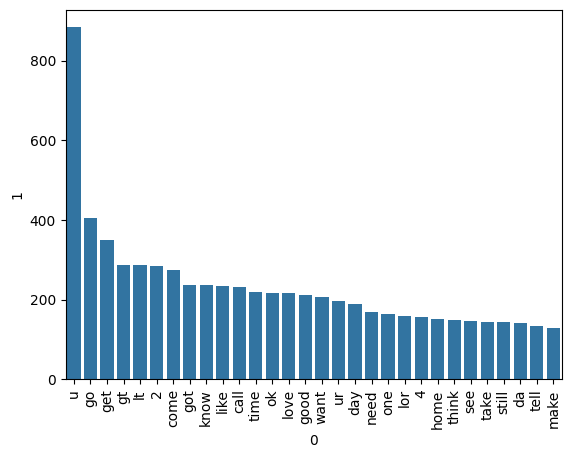

In [52]:
# Visualize most common ham words
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

7. Model Building


In [53]:
# Convert text to TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=3000)

In [54]:
X = tf_idf.fit_transform(df['Transformed_Text']).toarray()

In [55]:
X.shape

(5169, 3000)

In [56]:
y = df.Target.values

In [57]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, precision_score

In [59]:
# Initialize Naive Bayes classifiers
gn = GaussianNB()
mn = MultinomialNB()
bn = BernoulliNB()

In [60]:
# Train Gaussian Naive Bayes
gn.fit(X_train, y_train)

GaussianNB()

In [61]:
# Evaluate Gaussian Naive Bayes
print("Accuracy: ", gn.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, gn.predict(X_test)))
print("Precision: ", precision_score(y_test, gn.predict(X_test)))

Accuracy:  0.8704061895551257
Confusion Matrix: 
 [[788 108]
 [ 26 112]]
Precision:  0.509090909090909


In [62]:
# Train Multinomial Naive Bayes
mn.fit(X_train, y_train)

MultinomialNB()

In [63]:
# Evaluate Multinomial Naive Bayes
print("Accuracy: ", mn.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, mn.predict(X_test)))
print("Precision: ", precision_score(y_test, mn.predict(X_test)))

Accuracy:  0.971953578336557
Confusion Matrix: 
 [[896   0]
 [ 29 109]]
Precision:  1.0


In [64]:
# Train Bernoulli Naive Bayes
bn.fit(X_train, y_train)

BernoulliNB()

In [65]:
# Evaluate Bernoulli Naive Bayes
print("Accuracy: ", bn.score(X_test, y_test))
print("Confusion Matrix: \n", confusion_matrix(y_test, bn.predict(X_test)))
print("Precision: ", precision_score(y_test, bn.predict(X_test)))

# We chose Multinomial Naive Bayes since it has the best precision score

Accuracy:  0.9835589941972921
Confusion Matrix: 
 [[895   1]
 [ 16 122]]
Precision:  0.991869918699187


8. Comparing Different Models


In [66]:
# Import additional classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [67]:
# Initialize classifiers
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [68]:
# Create classifier dictionary
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [69]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    """
    Train classifier and return performance metrics
    """
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    precision = precision_score(y_test, clf.predict(X_test))
    return accuracy, precision

In [70]:
# Test SVC performance
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [71]:
# Train and evaluate all classifiers
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.84
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9696969696969697
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


c:\Users\sampa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9593810444874274
Precision -  0.8692307692307693
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.975609756097561
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9278350515463918
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9411764705882353


In [72]:
# Create performance comparison dataframe
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.971954,1.000000
5,RF,0.974855,0.982759
8,ETC,0.979691,0.975610
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
6,AdaBoost,0.961315,0.945455
10,xgb,0.968085,0.941176
9,GBDT,0.946809,0.927835
7,BgC,0.959381,0.869231


In [74]:
# Prepare data for visualization
performance_df1 = pd.melt(performance_df, id_vars="Algorithm")

In [75]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.971954
2,RF,Accuracy,0.974855
3,ETC,Accuracy,0.979691
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.956480
6,AdaBoost,Accuracy,0.961315
7,xgb,Accuracy,0.968085
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.959381


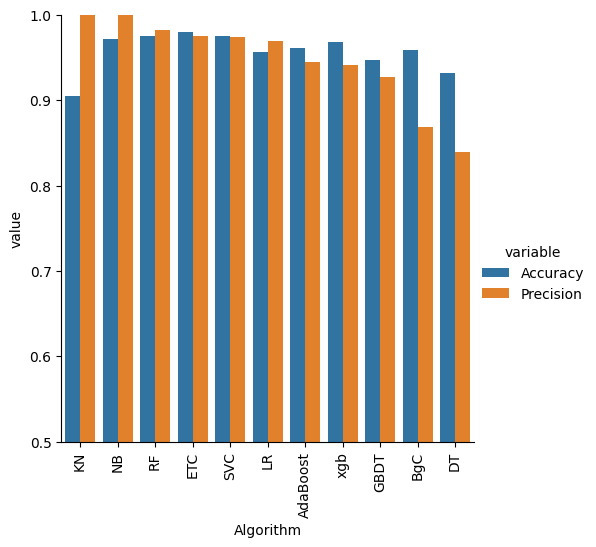

In [76]:
# Visualize model performance comparison
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

9. Save the Model


In [77]:
import pickle

In [78]:
# Save the TF-IDF vectorizer and the best performing model
pickle.dump(tf_idf, open('preprocessor.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))